In [1]:
# 📚 数据处理
import numpy as np  # 导入数值计算库，用于数组和矩阵操作
import pandas as pd  # 导入数据处理库，用于数据读取和处理

# 📊 可视化
import matplotlib.pyplot as plt  # 导入绘图库，用于绘制各种图表
import seaborn as sns  # 导入高级绘图库，基于matplotlib，便于绘制统计图表

# 🔍 数据统计
from scipy.stats import norm, skew  # 导入正态分布和偏度函数，用于统计分析
from scipy import stats  # 导入统计模块，包含多种统计函数

# ⚠️ 警告提示
import warnings  # 导入警告模块，用于控制警告信息显示
warnings.filterwarnings('ignore')  # 忽略所有警告信息，保持输出整洁

# 🎨 可视化风格
sns.set(style="whitegrid")  # 设置seaborn绘图风格为白色网格背景

from sklearn.preprocessing import LabelEncoder  # 导入标签编码器，用于类别变量编码
from sklearn.model_selection import KFold  # 导入K折交叉验证模块
from sklearn.metrics import mean_squared_error  # 导入均方误差评估指标

import lightgbm as lgb  # 导入LightGBM库，用于梯度提升树模型
from lightgbm import early_stopping, log_evaluation  # 导入LightGBM的早停和日志评估回调函数

print("✅ Libraries Imported Successfully!")  # 打印导入成功提示

✅ Libraries Imported Successfully!


In [2]:
# 📥 载入数据集
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 🔍 初步分析
print("✅ Data Loaded Successfully!")

# 🔢 数据集的形状
print(f"📌 Training Data Shape: {train.shape}")
print(f"📌 Test Data Shape: {test.shape}")

# 🔎 训练数据的初步观察
print("\n🔹 First 5 rows of Training Data:")
display(train.head())

# 🔎 测试数据的初步观察
print("\n🔹 First 5 rows of Test Data:")
display(test.head())

✅ Data Loaded Successfully!
📌 Training Data Shape: (1460, 81)
📌 Test Data Shape: (1459, 80)

🔹 First 5 rows of Training Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



🔹 First 5 rows of Test Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
# 🔬 数据类型和信息
print("\n🔹 Training Data Information:")
train.info()

print("\n🔹 Test Data Information:")
test.info()

# 📈 基本统计信息
print("\n🔹 Basic Statistics of Numerical Features (Train Data):")
display(train.describe())

print("\n🔹 Basic Statistics of Numerical Features (Test Data):")
display(test.describe())

# 📑 类别特征的唯一值数量
print("\n🔹 Unique Values in Categorical Features (Training Data):")
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()} unique values")


🔹 Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 no

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



🔹 Basic Statistics of Numerical Features (Test Data):


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000



🔹 Unique Values in Categorical Features (Training Data):
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
Garag


🔹 Missing Values in Training Data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

🔹 Missing Values in Test Data:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd     

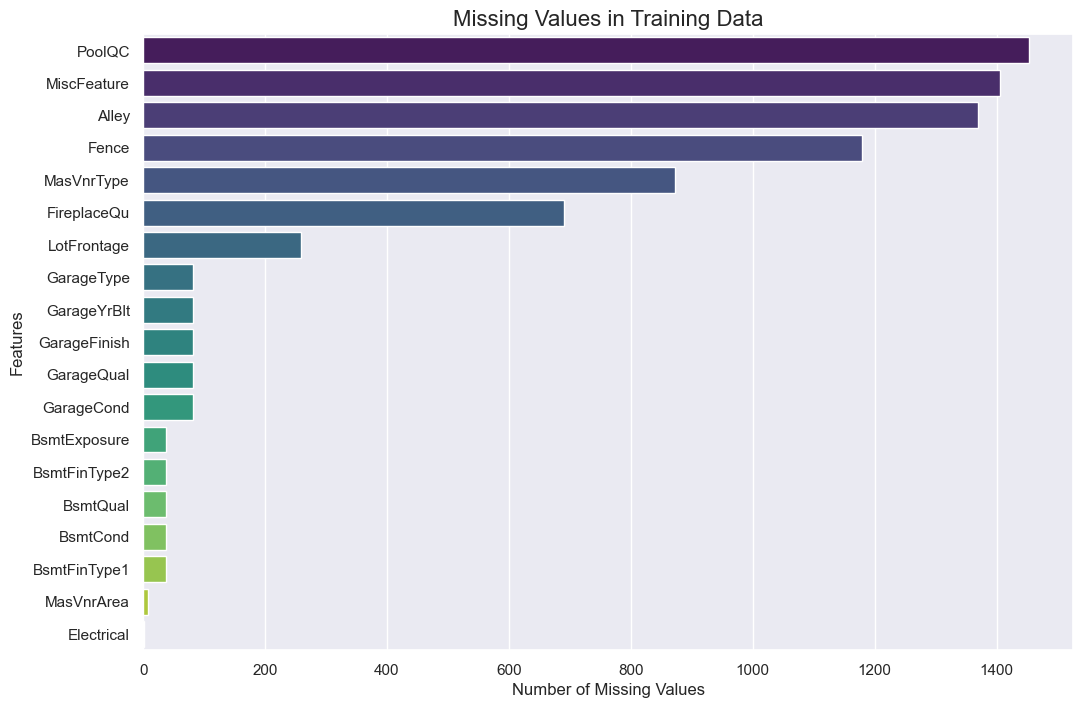

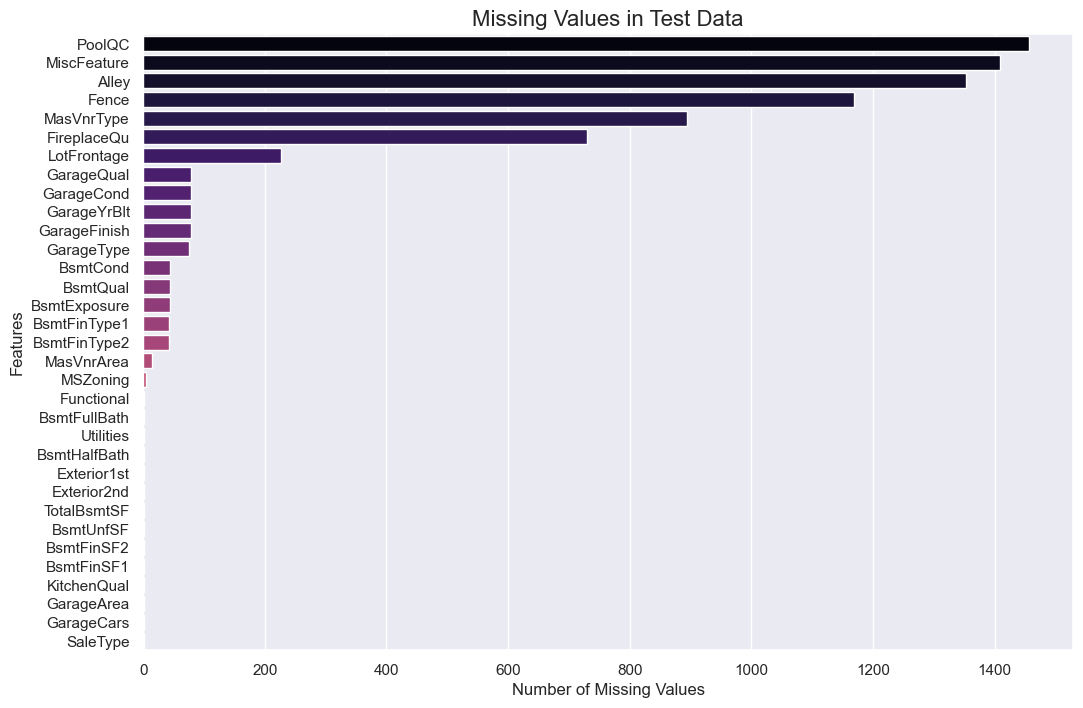

In [4]:
# 🔍 检查训练数据中的缺失值
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

print("\n🔹 Missing Values in Training Data:")
print(missing_train)

# 🔍 检查测试数据中的缺失值
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

print("\n🔹 Missing Values in Test Data:")
print(missing_test)

# 📊 可视化训练数据中的缺失值
plt.figure(figsize=(12, 8))
sns.barplot(y=missing_train.index, x=missing_train.values, palette="viridis")
plt.title('Missing Values in Training Data', fontsize=16)
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.show()

# 📊 可视化测试数据中的缺失值
plt.figure(figsize=(12, 8))
sns.barplot(y=missing_test.index, x=missing_test.values, palette="magma")
plt.title('Missing Values in Test Data', fontsize=16)
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.show()

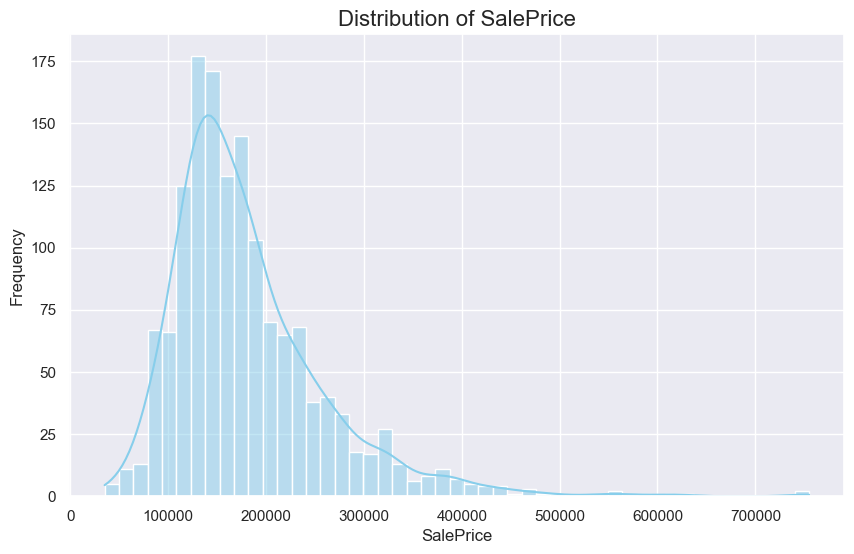

Skewness: 1.883
Kurtosis: 6.536


In [5]:
# 🎯 销售价格的分布
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 🧮 偏度和峰度
print(f"Skewness: {train['SalePrice'].skew():.3f}")
print(f"Kurtosis: {train['SalePrice'].kurt():.3f}")

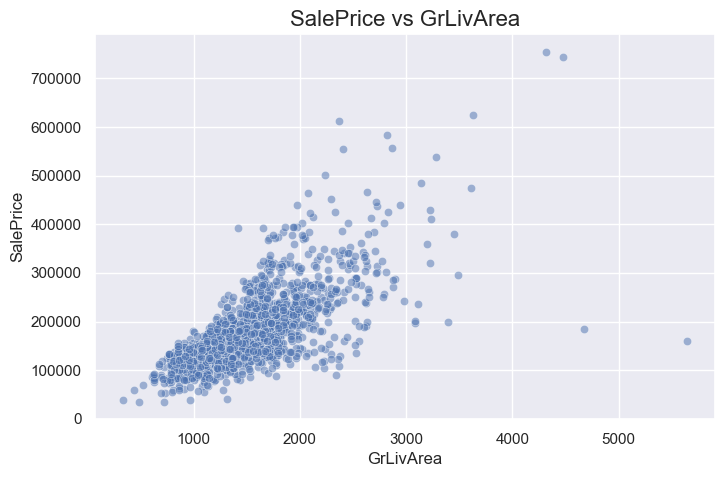

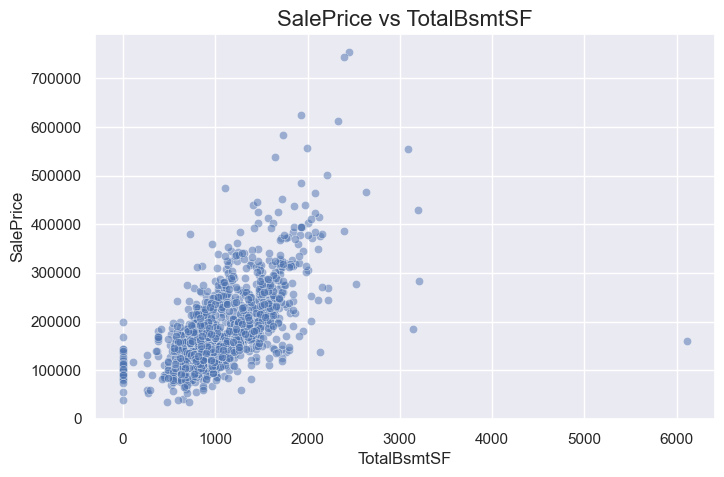

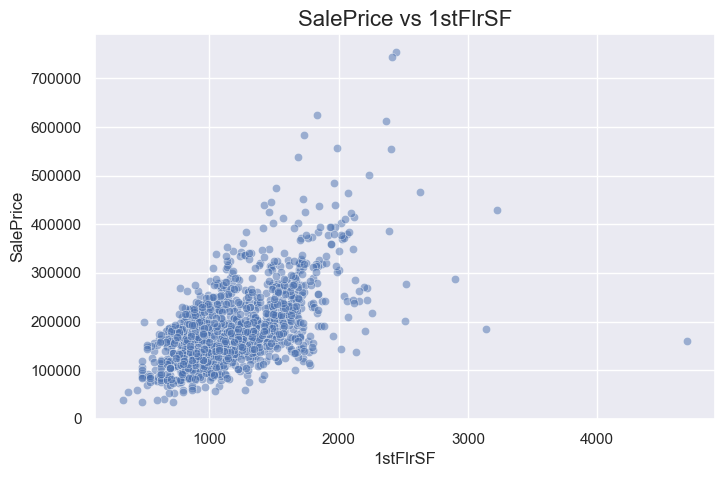

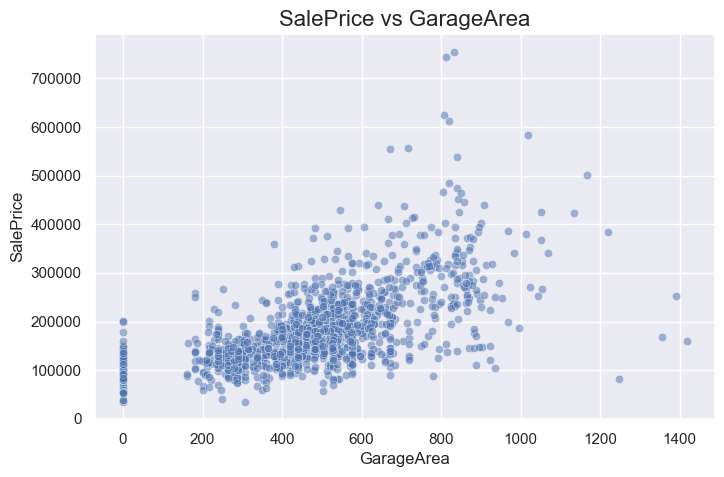

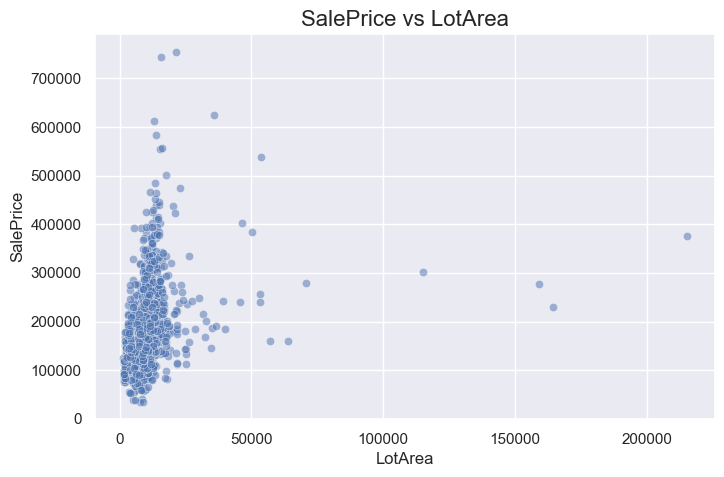

In [6]:
num_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotArea']

for feature in num_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=train[feature], y=train['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

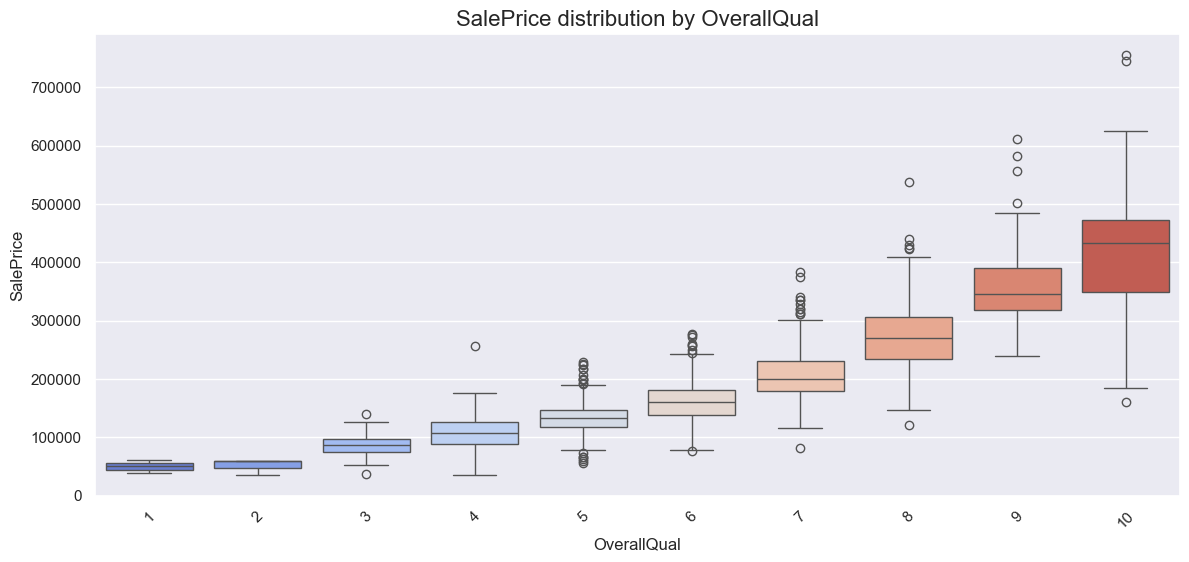

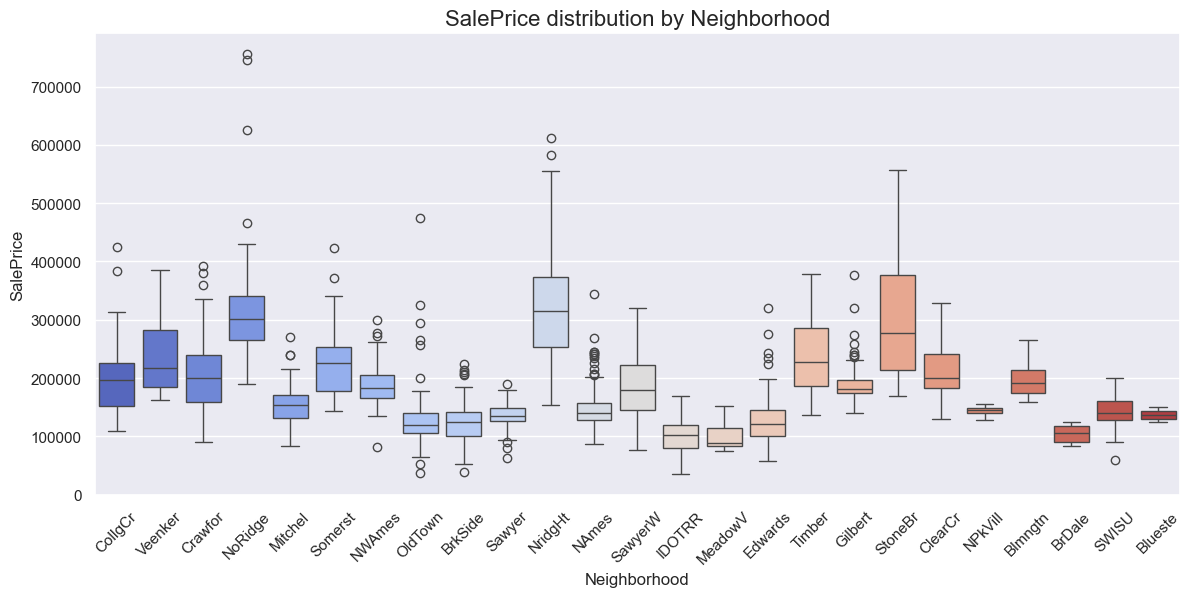

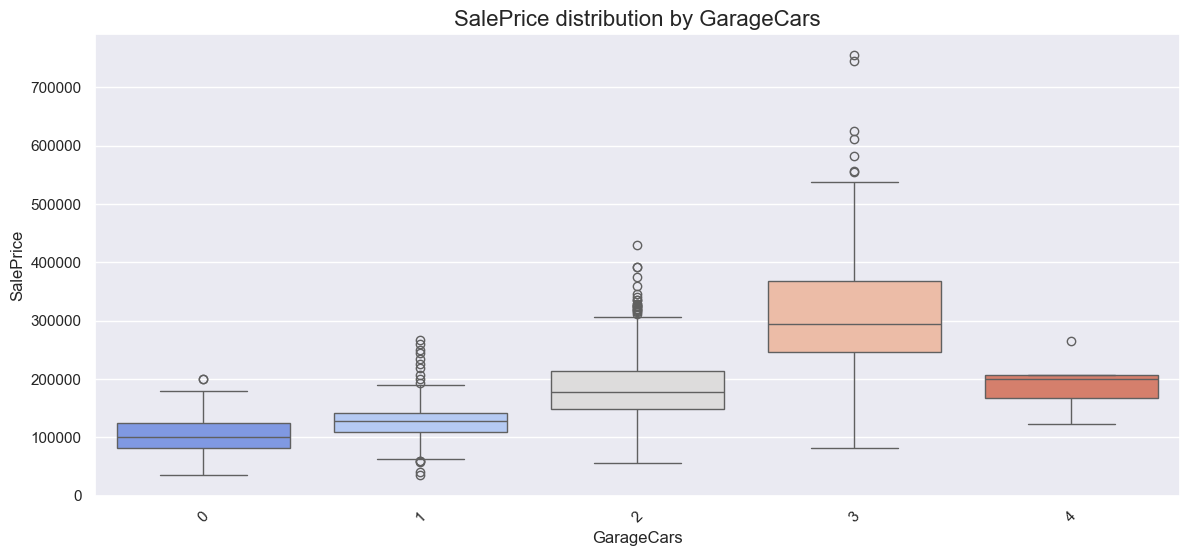

In [7]:
cat_features = ['OverallQual', 'Neighborhood', 'GarageCars']

for feature in cat_features:
    plt.figure(figsize=(14,6))
    sns.boxplot(x=feature, y='SalePrice', data=train, palette="coolwarm")
    plt.title(f'SalePrice distribution by {feature}', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

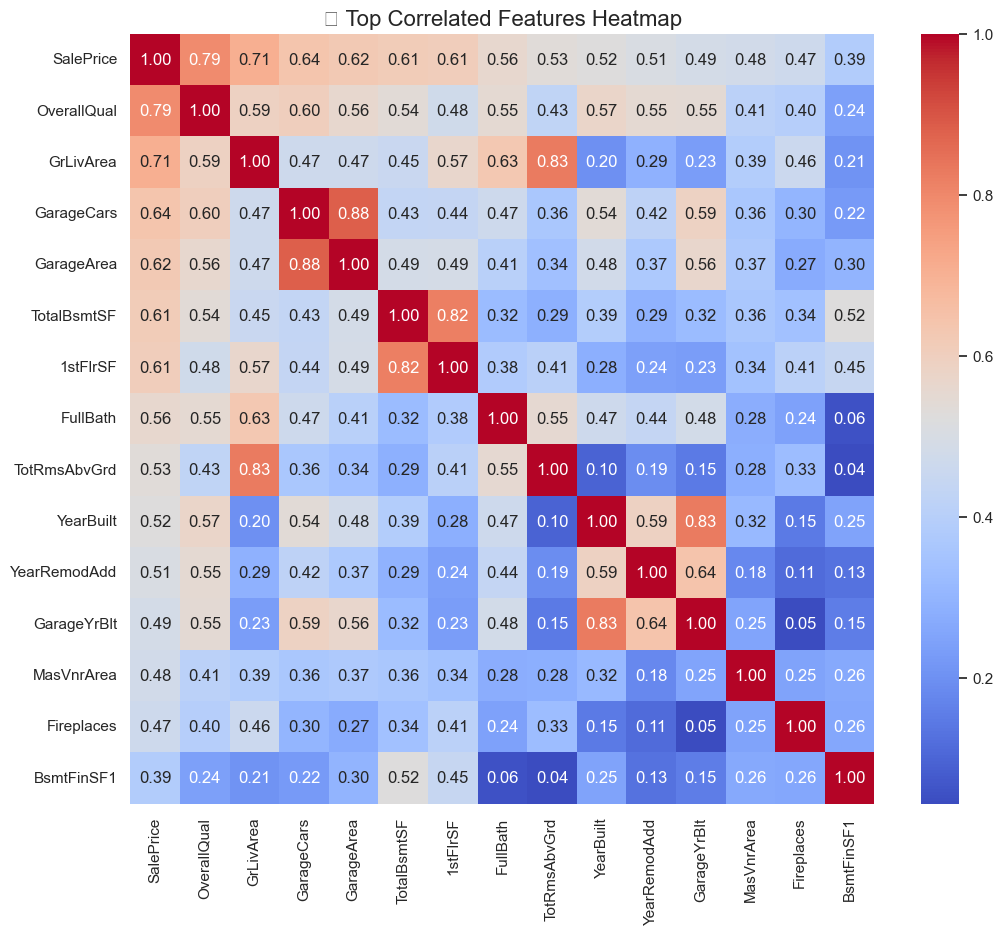

In [8]:
# 🔧 选择数值型列进行相关性分析
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numeric_features].corr()

# 🔍 找出与SalePrice相关性最高的15个数值特征
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index

# 📌 绘制热力图
plt.figure(figsize=(12,10))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('🔝 Top Correlated Features Heatmap', fontsize=16)
plt.show()

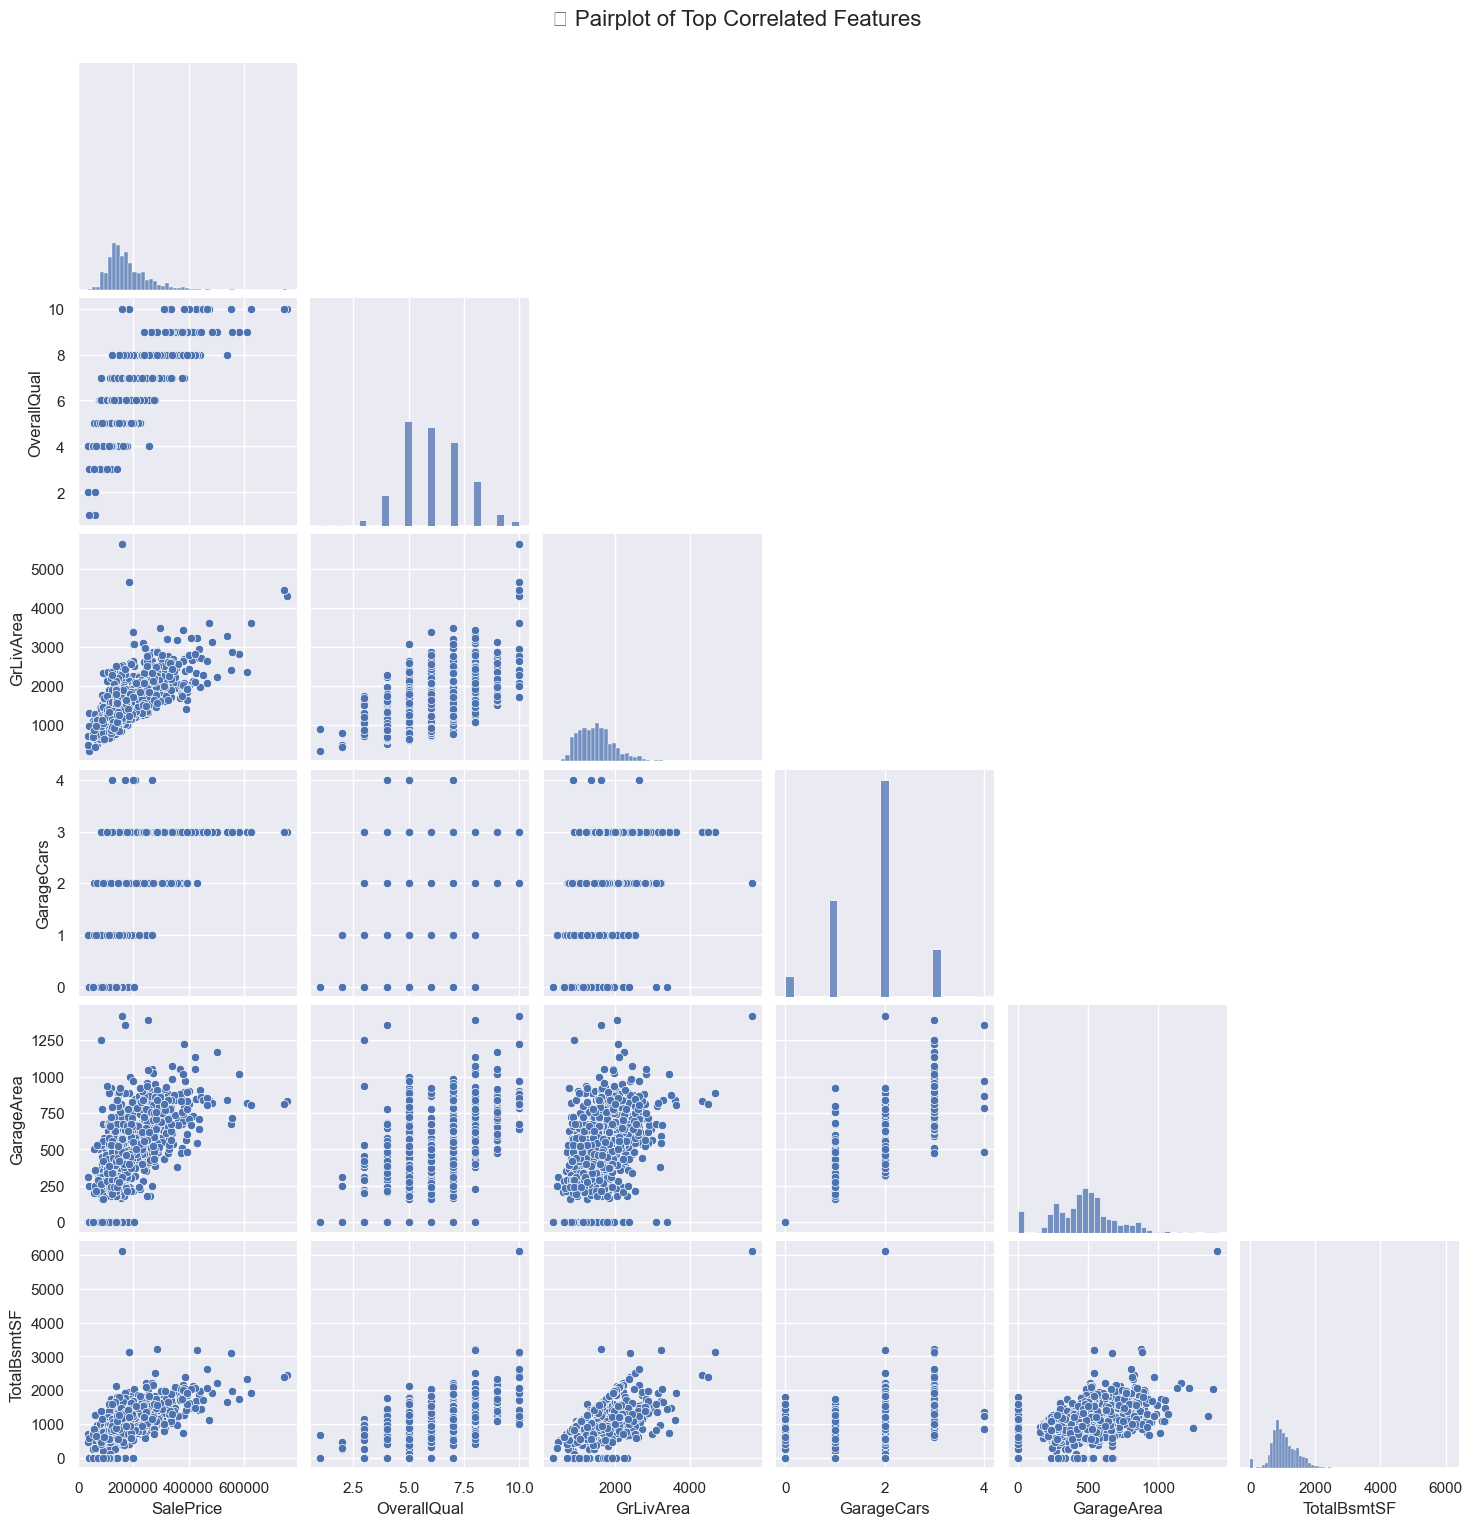

In [9]:
sns.pairplot(train[top_corr_features[:6]], corner=True)
plt.suptitle('🔗 Pairplot of Top Correlated Features', fontsize=16, y=1.02)
plt.show()

In [12]:
y = train["SalePrice"]
train_id = train["Id"]
test_id = test["Id"]

# 🧹 数据预处理
def preprocess(df):
    df = df.copy()
    for col in df.select_dtypes(include="object"):
        df[col] = df[col].fillna("None")
        df[col] = LabelEncoder().fit_transform(df[col])
    for col in df.select_dtypes(include=["int64", "float64"]):
        df[col] = df[col].fillna(df[col].median())
    return df

# 🎯 特征分离
X = preprocess(train.drop(["Id", "SalePrice"], axis=1))
X_test = preprocess(test.drop("Id", axis=1))

# 🔁 K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(X))
preds = np.zeros(len(X_test))

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[
            early_stopping(stopping_rounds=100),
            log_evaluation(period=100)
        ]
    )

    oof[val_idx] = model.predict(X_val)
    preds += model.predict(X_test) / kf.n_splits

# 🧮 计算交叉验证的RMSE
mse = mean_squared_error(y, oof)
rmse = np.sqrt(mse)
print(f"✅ CV RMSE: {rmse:.4f}")

# rmse = mean_squared_error(y, oof, squared=False)
# print(f"✅ CV RMSE: {rmse:.4f}")

# 💾 生成提交文件
submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": preds
})
submission.to_csv("submission_1.csv", index=False)
print("🚀 submission.csv has been created.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3126
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 181441.541952
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.3356e+09
[200]	valid_0's l2: 1.22874e+09
[300]	valid_0's l2: 9.76738e+08
[400]	valid_0's l2: 8.89607e+08
[500]	valid_0's l2: 8.4478e+08
[600]	valid_0's l2: 8.33104e+08
[700]	valid_0's l2: 8.26842e+08
[800]	valid_0's l2: 8.24209e+08
[900]	valid_0's l2: 8.22418e+08
[1000]	valid_0's l2: 8.21477e+08
Did not meet early stopping. Best iteration is:
[976]	valid_0's l2: 8.20308e+08
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31